In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor  # Menggunakan DecisionTreeRegressor untuk regresi
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


In [11]:
train_data = pd.read_excel('[Dataset]_Train_(Keryawan).xlsx')
test_data = pd.read_excel('[Dataset]_Test_(Karyawan).xlsx')

In [12]:
print("Training Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())

Training Data:
  Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_23371      F  42.0                4             Married     Franklin   
1   EID_18000      M  24.0                3              Single  Springfield   
2    EID_3891      F  58.0                3             Married      Clinton   
3   EID_17492      F  26.0                3              Single      Lebanon   
4   EID_22534      F  31.0                1             Married  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  ...  Compensation_and_Benefits  Work_Life_bala

In [13]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [15]:
print(train_data.columns)
print(test_data.columns)


Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')
Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7'],
      dtype='object')


In [20]:
train_data = train_data.drop(columns=['Employee_ID'])
test_data = test_data.drop(columns=['Employee_ID'])

In [21]:
label_encoders = {}
for column in train_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    if column in test_data.columns:
        test_data[column] = le.transform(test_data[column])
    label_encoders[column] = le

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data.drop(columns=['Attrition_rate']))
X_test = scaler.transform(test_data)
y_train = train_data['Attrition_rate']

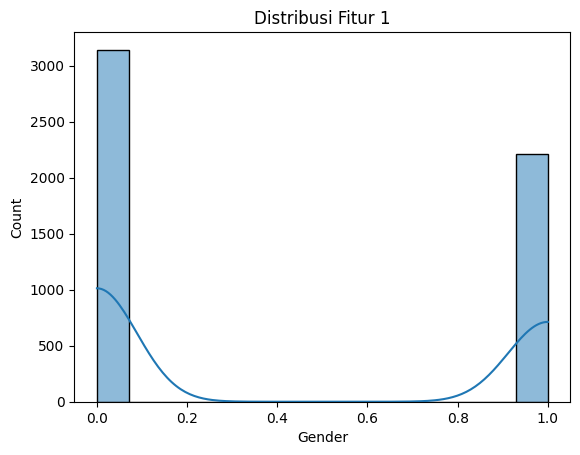

In [23]:
sns.histplot(train_data.iloc[:, 0], kde=True)
plt.title('Distribusi Fitur 1')
plt.show()

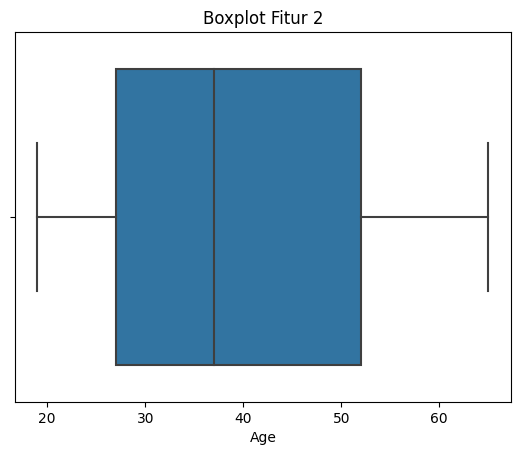

In [24]:
sns.boxplot(x=train_data.iloc[:, 1])
plt.title('Boxplot Fitur 2')
plt.show()

In [29]:
y_train_class = (train_data['Attrition_rate'] > 0.5).astype(int)


DecisionTreeClassifier(random_state=42)

In [31]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train_class)

DecisionTreeClassifier(random_state=42)

In [32]:
y_pred_class = model.predict(X_test)


In [33]:
accuracy = accuracy_score(y_train_class[:len(y_pred_class)], y_pred_class)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8371391641533822


In [35]:
cm = confusion_matrix(y_train_class[:len(y_pred_class)], y_pred_class)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1920  232]
 [ 146   23]]


In [36]:
accuracy = accuracy_score(y_train_class[:len(y_pred_class)], y_pred_class)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8371391641533822


In [39]:
accuracy = accuracy_score(y_train_class[:len(y_pred_class)], y_pred_class)
precision = precision_score(y_train_class[:len(y_pred_class)], y_pred_class, average='weighted')
recall = recall_score(y_train_class[:len(y_pred_class)], y_pred_class, average='weighted')


In [40]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Accuracy: 0.8371391641533822
Precision: 0.8682316643334852
Recall: 0.8371391641533822


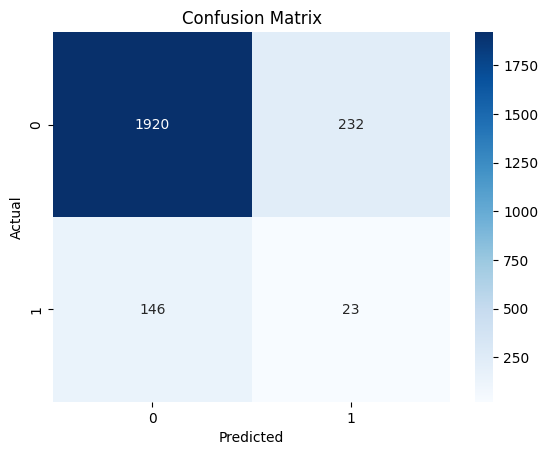

In [41]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()